# **Assignment 2: Statistical Treatment for Retail Datasets**

**Nama : Diva Nabila**

**Kode : PYTN-KS20-019**

# **Introduction**

**Project Overview**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
- `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- `BLOCK`, `LOT`: The combination of borough, block and lot forms a unique key for property in New York City. Commonly called a BBL. 
- `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE` : The type of building at various points in time. 

Note that because this is a financia transaction dataset, there are some points that need to be kept in mind:
- Many sales occur with a nonsensically small dollar amount : $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement. 
- This dataset uses the financial definition of a building.building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group apartments) owned by some individual.

# **Import Pustaka**

In [2]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import gaussian_kde
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from statistics import NormalDist
from statistics import NormalDist

# **Data Loading**

In [3]:
# Input dataset yang akan digunakan
nyc_property_sales = pd.read_csv("D:/nyc-rolling-sales.csv")

In [4]:
# Menampilkan dataset
nyc_property_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# Membuat salinan data agar tidak mengubah data asli ketika terdapat analisis 
df = nyc_property_sales.copy()

In [6]:
# Melihat isi informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# **Data Cleaning**

In [7]:
# Menghapus kolom unnamed karena itu sama saja nomor yang disediakan pada notebook
df = df.drop(["Unnamed: 0"], axis=1)

# Membuat judul pada masing-masing kolom menjadi huruf kecil
df.columns = (df.columns.str.lower()).str.replace(" ","_")

In [8]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
# Memisahkan antara data numerik dan kategorik
num_columns = ["residential_units","commercial_units","total_units","land_square_feet","gross_square_feet","year_built","sale_price"]

# Looping untuk semua data numerik 
for col in num_columns:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [10]:
# Data kategorik
cat_columns = []

# Looping untuk data kategorik
for col in df.columns[:-1]:
    if col not in num_columns:
        cat_columns.append(col)
for col in cat_columns:
    df[col] = df[col].astype("category")

In [11]:
# Mengubah kolom saled_date menjadi datetime
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [12]:
# Membuat fungsi untuk melabeli kolom borough sesuai dengan perintah
def renaming_borough(x):
    if x == 1:
        return "Manhattan"
    elif x == 2:
        return "Bronx"
    elif x == 3:
        return "Brooklyn"
    elif x == 4:
        return "Queens"
    else:
        return "Staten Island"

In [13]:
# terapkan fungsi diatas pada kolom borough dataset
df["borough"] = df["borough"].apply(renaming_borough)

# Menampilkan dataset dengan kondisi sekarang
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [14]:
# Menghitung nilai NaN pada semua variabelnya
df = df.replace(" ",np.nan)

null_values = pd.DataFrame({"columns":df.isnull().sum().index,
                            "null_values":df.isnull().sum().values,
                            "percentage_of_null_values":[i/len(df)*100 for i in df.isnull().sum().values]})
null_values = null_values[null_values["null_values"] != 0]
null_values = null_values.sort_values("null_values",ascending=False).reset_index(drop=True)
null_values

,columns,null_values,percentage_of_null_values
0,ease-ment,84548,100.000000
1,apartment_number,65496,77.466055
2,gross_square_feet,27612,32.658372
3,land_square_feet,26252,31.049818
4,sale_price,14561,17.222170
5,tax_class_at_present,738,0.872877
6,building_class_at_present,738,0.872877


In [15]:
# Hapus kolom ease-ment dan apartment_number karena memiliki NaN mendekati jumlah data
df = df.drop(['ease-ment','apartment_number',],axis=1)

In [16]:
# Hapus juga kolom tax_class_at_present, building_class_at_present karena memiliki nilai NaN
df = df.dropna(subset=["tax_class_at_present","building_class_at_present"])

In [17]:
# Mengisi NaN values menggunakan nilai 0
for i in ["land_square_feet","gross_square_feet","sale_price"]:
    df[i] = df[i].fillna(0)

In [18]:
# Karena sale price merupakan target, jadi yang memiliki nilai 0 kita hapus 
df = df[df["sale_price"] != 0]

In [19]:
df.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


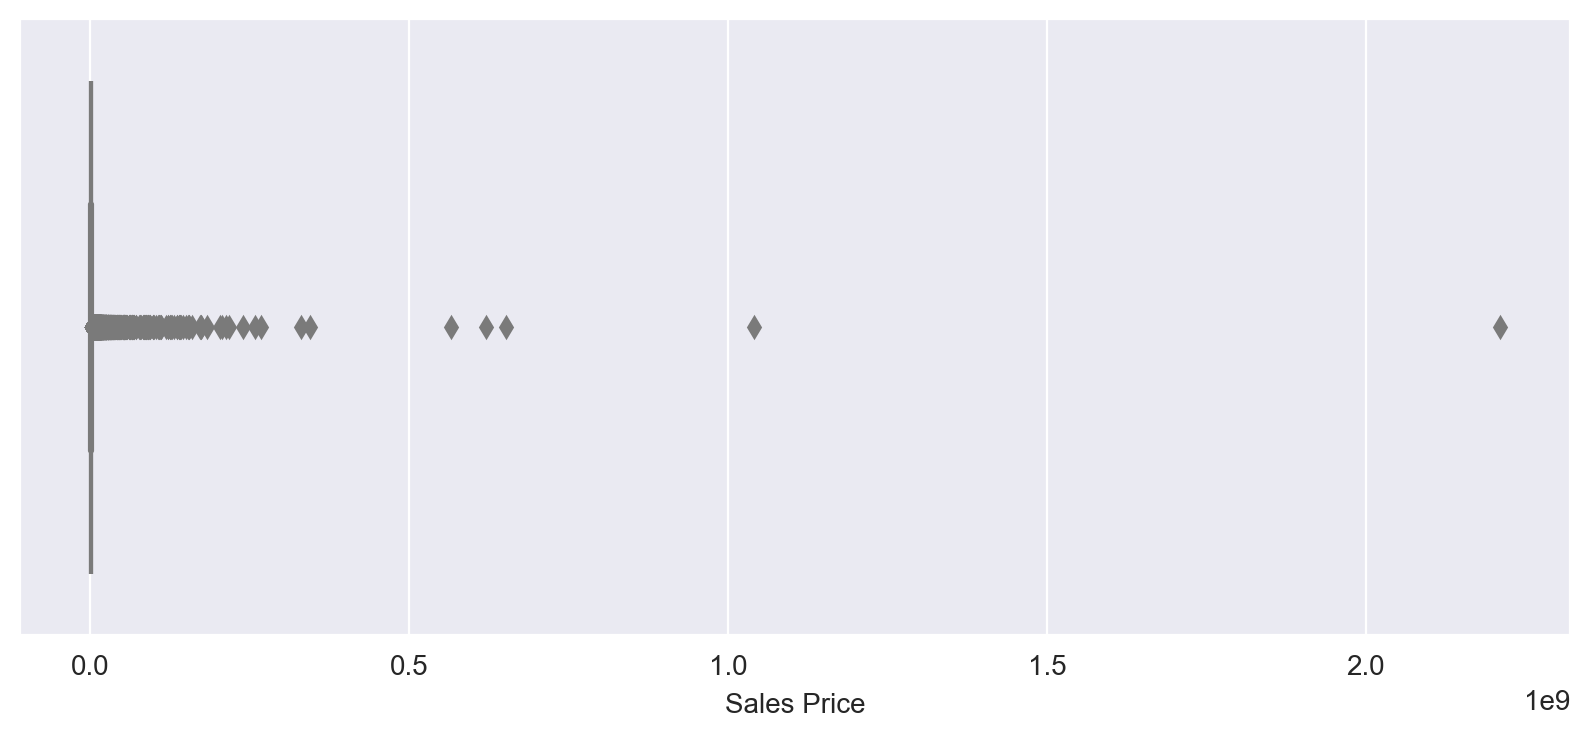

In [20]:
# Karena kita akan melihat kondisi statistik dari data lebih baik cek outliers
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df,x="sale_price",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

In [21]:
# Karena banyak outliers, maka harus dihapus menggunakan metode iqr
sale_price_q1 = df["sale_price"].describe().loc["25%"]
sale_price_q3 = df["sale_price"].describe().loc["75%"]
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

df_clean = df[(df["sale_price"] >= sale_price_lower_limit) & (df["sale_price"] <= sale_price_upper_limit)]

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sale_price'>

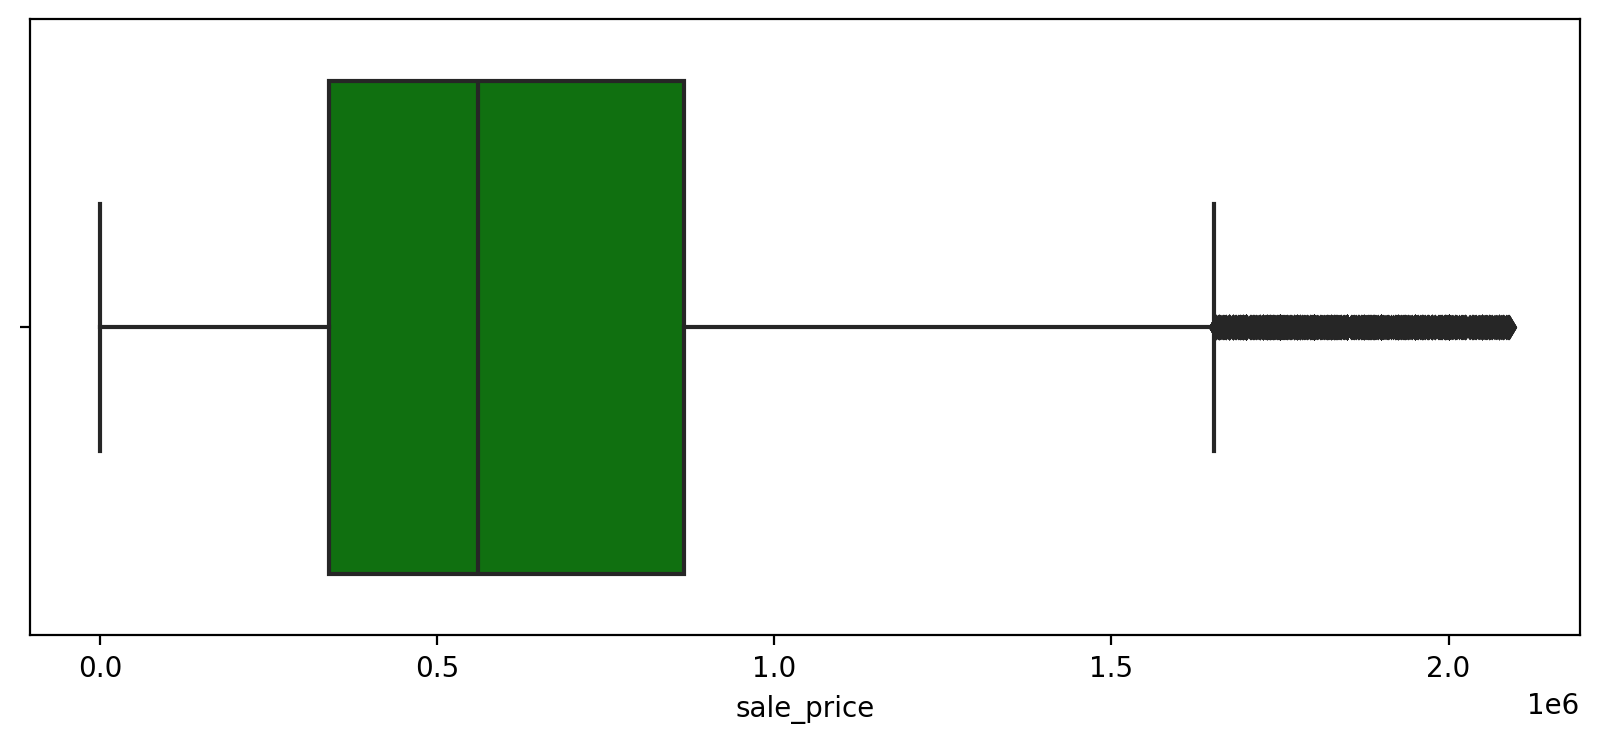

In [22]:
# Check lagi outliers
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_clean,x="sale_price", color="green")

In [23]:
# Karena masih terdapat banyak outliers maka dibuat looping untuk metode iqr (hapus outliers)
n = 1
limit = 2

while n <= limit:
    sale_price_q1 = df_clean["sale_price"].describe().loc["25%"]
    sale_price_q3 = df_clean["sale_price"].describe().loc["75%"]
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    df_clean = df_clean[(df_clean["sale_price"] >= sale_price_lower_limit) & (df_clean["sale_price"] <= sale_price_upper_limit)]
    
    n += 1

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sale_price'>

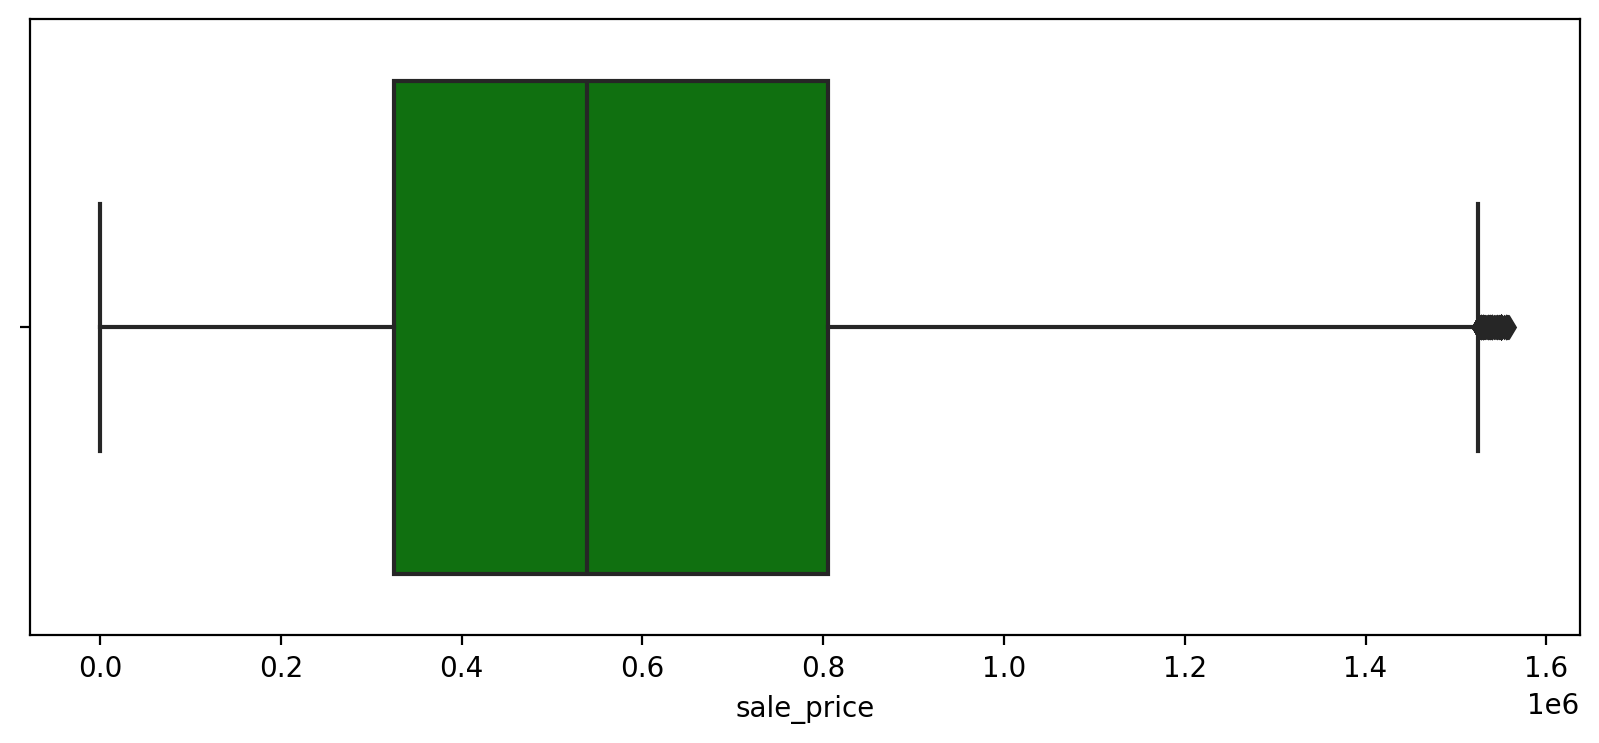

In [24]:
# Check outliers kembali
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_clean,x="sale_price", color="green")

Karena sudah lumayan bersih dan outliersnya pun sisa sedikit, maka lanjutkan saja ke tahap selanjutnya

# **Measures of Central Tendency**

Menghitung Measures of Central Tendency: 
- Mean 
- Median 
- Mode 
- Range 
- Variance 
- Standard Deviation

In [25]:
# Membuat dataframe baru dengan mengelompokkan borough dengan tax_class_at_present berdasarkan sale price
measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean, #mean
                                                                                  np.median, #median
                                                                                  mode, #modus
                                                                                  np.ptp, #range
                                                                                  np.var, #varians
                                                                                  np.std]}).reset_index() #standar deviasi
measure.columns = measure.columns.droplevel(-1) #meratakan kolom
measure.columns = ["borough","tax_class_at_present","mean","median","mode","range","variance","standard_deviation"]
measure = measure.dropna() # Menghapus baris yang mengandung nilai NaN
measure

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_16572\1786698454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean, #mean
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_16572\1786698454.py:2: FutureWarning: The provided callable <function mean at 0x0000029B441F5BC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean, #mean
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_16572\1786698454.py:2: FutureWarning: The provided callable <function median at 0x0000029B44329F80> is currently usin

,borough,tax_class_at_present,mean,median,mode,range,variance,standard_deviation
0,Manhattan,1,7.485589e+05,833212.5,10.0,1549990.0,3.467105e+11,588821.316390
3,Manhattan,1C,1.159167e+06,1102500.0,900000.0,575000.0,8.506458e+10,291658.333214
4,Manhattan,2,7.887589e+05,750000.0,1100000.0,1556999.0,1.247826e+11,353245.852119
5,Manhattan,2A,1.105614e+06,1300000.0,1320000.0,1524990.0,2.681566e+11,517838.423801
6,Manhattan,2B,6.838419e+05,645185.0,10.0,1505999.0,3.572927e+11,597739.698242
7,Manhattan,2C,7.704679e+05,732500.0,1500000.0,1549990.0,1.289199e+11,359054.238654
9,Manhattan,4,3.066005e+05,72934.5,33900.0,1499999.0,1.740622e+11,417207.589854
10,Bronx,1,4.504145e+05,450000.0,10.0,1549999.0,3.707326e+10,192544.183408
11,Bronx,1A,3.158523e+05,310000.0,230000.0,802281.0,2.226090e+10,149200.871084
12,Bronx,1B,3.361601e+05,290000.0,1000.0,1464999.0,1.180873e+11,343638.290800


c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


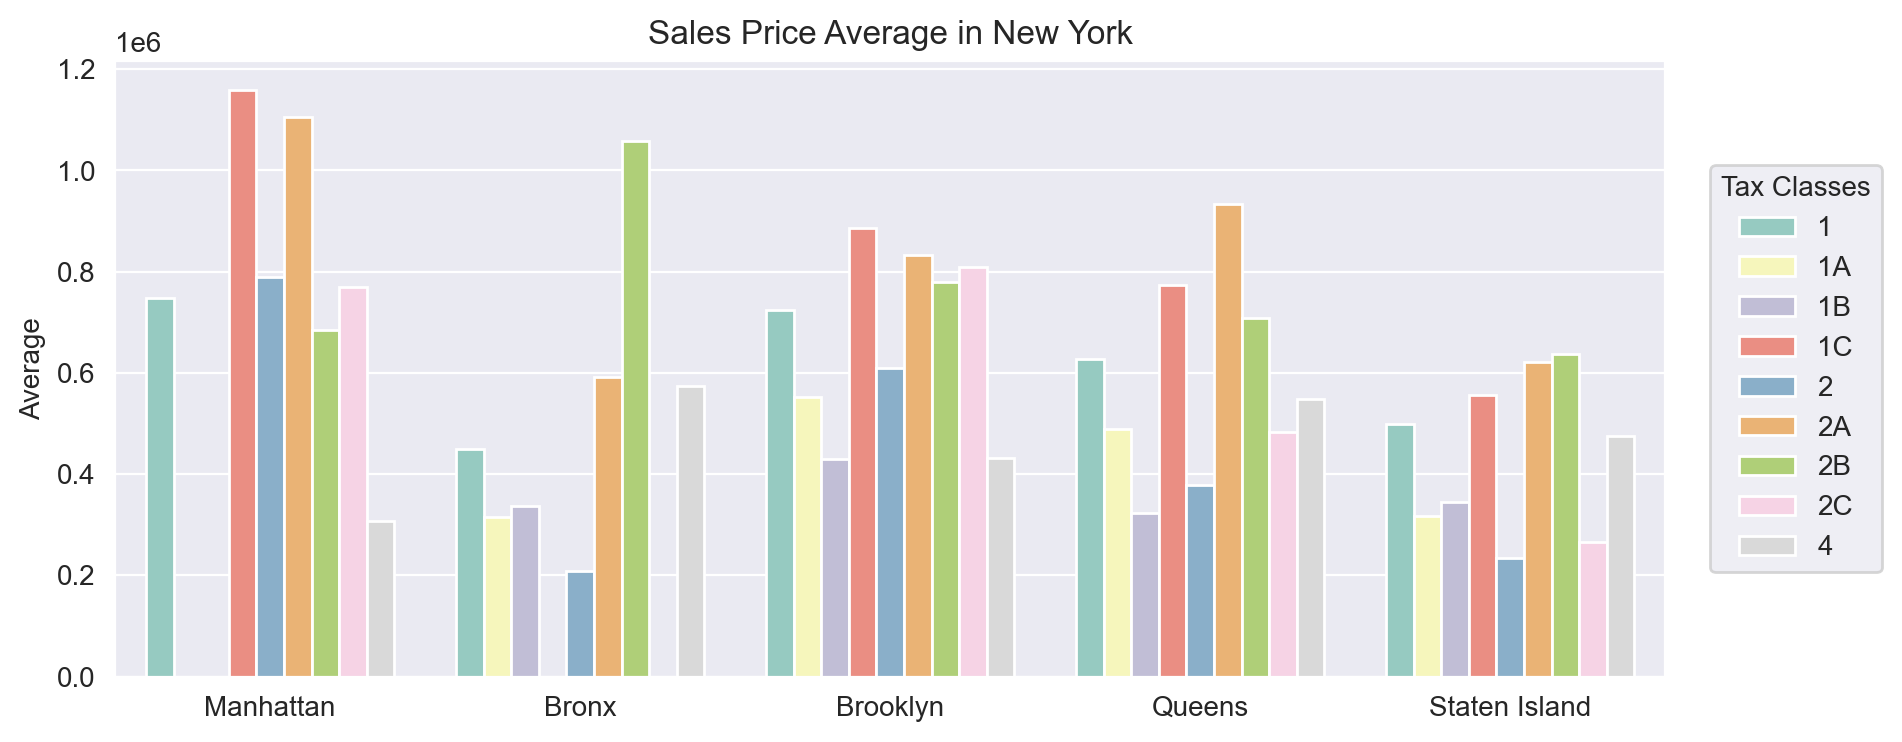

In [26]:
# Menampilkan visualisasi rata-rata dari tax_class_at_present tiap-tiap borough berdasar
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(data=measure,x="borough",y="mean",hue="tax_class_at_present",palette="Set3",
                hue_order=np.sort(measure["tax_class_at_present"].unique()))
    plt.title("Sales Price Average in New York")
    plt.xlabel("")
    plt.ylabel("Average")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Tax Classes")
    plt.show()

**Confidence Intervals of Sample Mean**

Berdasarkan histogram diatas, didapat borough yang memiliki rata-rata sale price tertinggi yaitu Queens pada tax_calsses 1C, Brooklyn pada tax_classes 2C dan Bronc pada tax_classes 2B. 

In [27]:
# mengekstrak ketiga nilai tertinggi diatas 
top_3_means = measure.sort_values("mean",ascending=False).head(3)
top_3_means

# Looping dan memfilter dengan data asli
temp = []
for i,j in zip(top_3_means["borough"],top_3_means["tax_class_at_present"]):
    temp.append(df_clean[(df_clean["borough"] == i) & 
                         (df_clean["tax_class_at_present"] == j)])

# menggabungkan DataFrame yang difilter dalam daftar temp dan mengekstrak nilai "sale_price," mengonversinya menjadi array NumPy. 
top_3_sale_price = np.array(pd.concat(temp)["sale_price"])
top_3_sale_price

array([9.000000e+05, 1.102500e+06, 1.475000e+06, 1.000000e+01,
       3.130000e+05, 1.320000e+06, 1.800000e+05, 8.425000e+05,
       1.431326e+06, 1.100000e+06, 1.525000e+06, 1.300000e+06,
       1.300000e+06, 1.469500e+06, 1.275000e+06, 1.487500e+06,
       1.525000e+06, 1.400000e+06, 4.063000e+03, 1.320000e+06,
       1.500000e+06, 1.515000e+06, 1.130000e+06, 1.280000e+06,
       1.315000e+06, 8.800000e+05, 9.500000e+05, 1.100000e+06,
       1.175000e+06, 8.750000e+05, 1.200000e+06, 1.250000e+06,
       1.250000e+06, 1.100000e+06, 1.175000e+06, 1.525000e+06,
       1.100000e+06, 1.050000e+06, 4.300000e+04, 1.350000e+06,
       1.020000e+06, 1.400000e+06, 1.260000e+06, 7.500000e+05,
       1.555000e+06, 8.400000e+05, 1.000000e+06, 5.000000e+05,
       1.425000e+06, 1.200000e+06, 1.450000e+06, 1.232030e+06,
       1.150000e+06, 1.350000e+06, 1.265000e+06, 1.264000e+06,
       1.150000e+06, 1.100000e+06, 7.650000e+05, 1.380000e+06,
       1.000000e+06, 8.500000e+05, 9.400000e+05, 9.1000

In [28]:
# Mencari nilai rata rata sampel acak sebanyak 25 dari top_3_sale_price
np.random.seed(9071)
sample_mean = []
n = 25

for i in range(500):
    temp_value = np.random.choice(a=top_3_sale_price,size=n)
    temp_mean = np.mean(temp_value)
    sample_mean.append(temp_mean)

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_16572\2400145984.py:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in leg.legendHandles:


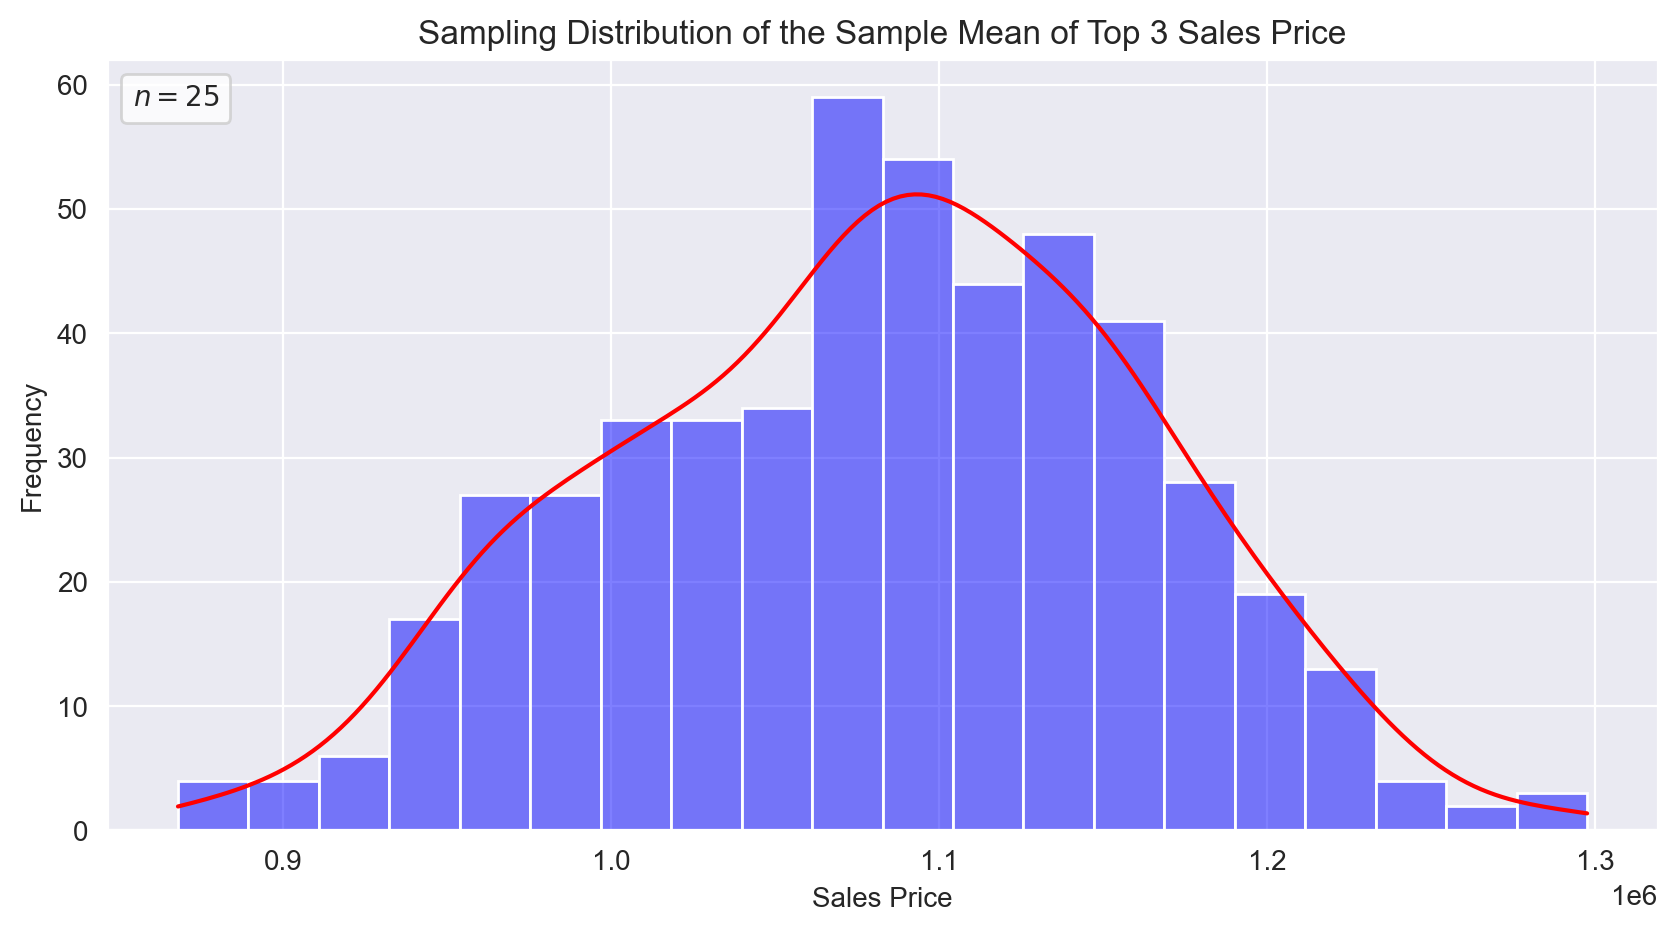

In [29]:
# Menampilkan visualisasi dari fungsi diatas agar lebih mudah dipahami
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sample_mean,bins=20,kde=True,color="blue",label=f"$n = {n}$")
    ax.lines[0].set_color("red")
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    for item in leg.legendHandles:
        item.set_visible(False)
    plt.show()

Histigram diatas memberikan gambaran terhadap statistik deskriptif pada dataset diatas. 

In [30]:
#Menghitung nilai mean, median dan standar deviasi pada ketiga top sale prices
sample_mean_median = np.median(sample_mean)
sample_mean_mean = np.mean(sample_mean)
sample_mean_std = np.std(sample_mean)

for i,j in zip(["Median","Mean","Std."],[sample_mean_median,sample_mean_mean,sample_mean_std]):
    print(f"{i}\t= {j}")

Median	= 1086433.24
Mean	= 1081532.79192
Std.	= 80233.03199431376


In [31]:
# Mengukur sejauh mana rata-rata ke tiga top sale price tersebut dapat diharapkan mewaikili rata-rata populasi
standard_error = np.std(top_3_sale_price)/np.sqrt(n)
standard_error

77891.958373528

Dengan nilai standard error sebesar 77891.958373528, perlu diperhatikan bahwa rata-rata sampel mungkin bervariasi dalam rentang yang signifikan. Sehingga daoat disimpulkan bahwa top_3_sale_price memiliki variasi yang cukup besar, dan hasil estimasi rata-rata populasi perlu diinterpretasikan dengan hati-hati mengingat ketidakpastian yang dinyatakan oleh standard error yang tinggi. 

In [32]:
# Melihat nilai dari z-scorenya 
confidence = 0.95
z = NormalDist().inv_cdf((1 + confidence) / 2)
z

1.9599639845400536

Jadi, dengan z-score sebesar 1.95996, kita dapat menyimpulkan bahwa nilai observasi tersebut berada di sekitar dua deviasi standar di atas rata-rata populasi dalam distribusi normal standar. Perhatikan bahwa interpretasi ini bergantung pada asumsi distribusi normal. Jika distribusi tidak normal, interpretasi z-score dapat bervariasi.

Setelah menghitung z-score, kita cari batas bawah dan batas agar tau rentang keberadaan rata rata populasinya. Tingkat signifikansi/kepercayaan yang digunakan adalah 95%

In [33]:
# Memisahkan batas atas dan batas bawah
lower_95 = sample_mean_mean - (z * standard_error)
upper_95 = sample_mean_mean + (z * standard_error)

# Looping untuk menampilkan batas atas dan batas bawah
for i,j in zip(["Lower Limit","Upper Limit"],[lower_95,upper_95]):
    print(f"{i}\t= {j}")

Lower Limit	= 928867.3588225921
Upper Limit	= 1234198.225017408


Dengan batas bawah dan batas atas yang dihitung, kita dapat mengatakan dengan tingkat kepercayaan 95% bahwa nilai rata-rata populasi berada di antara 928,867.3588225921 dan 1,234,198..225017408

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_16572\1765066094.py:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [item.set_visible(False) for item in leg.legendHandles]


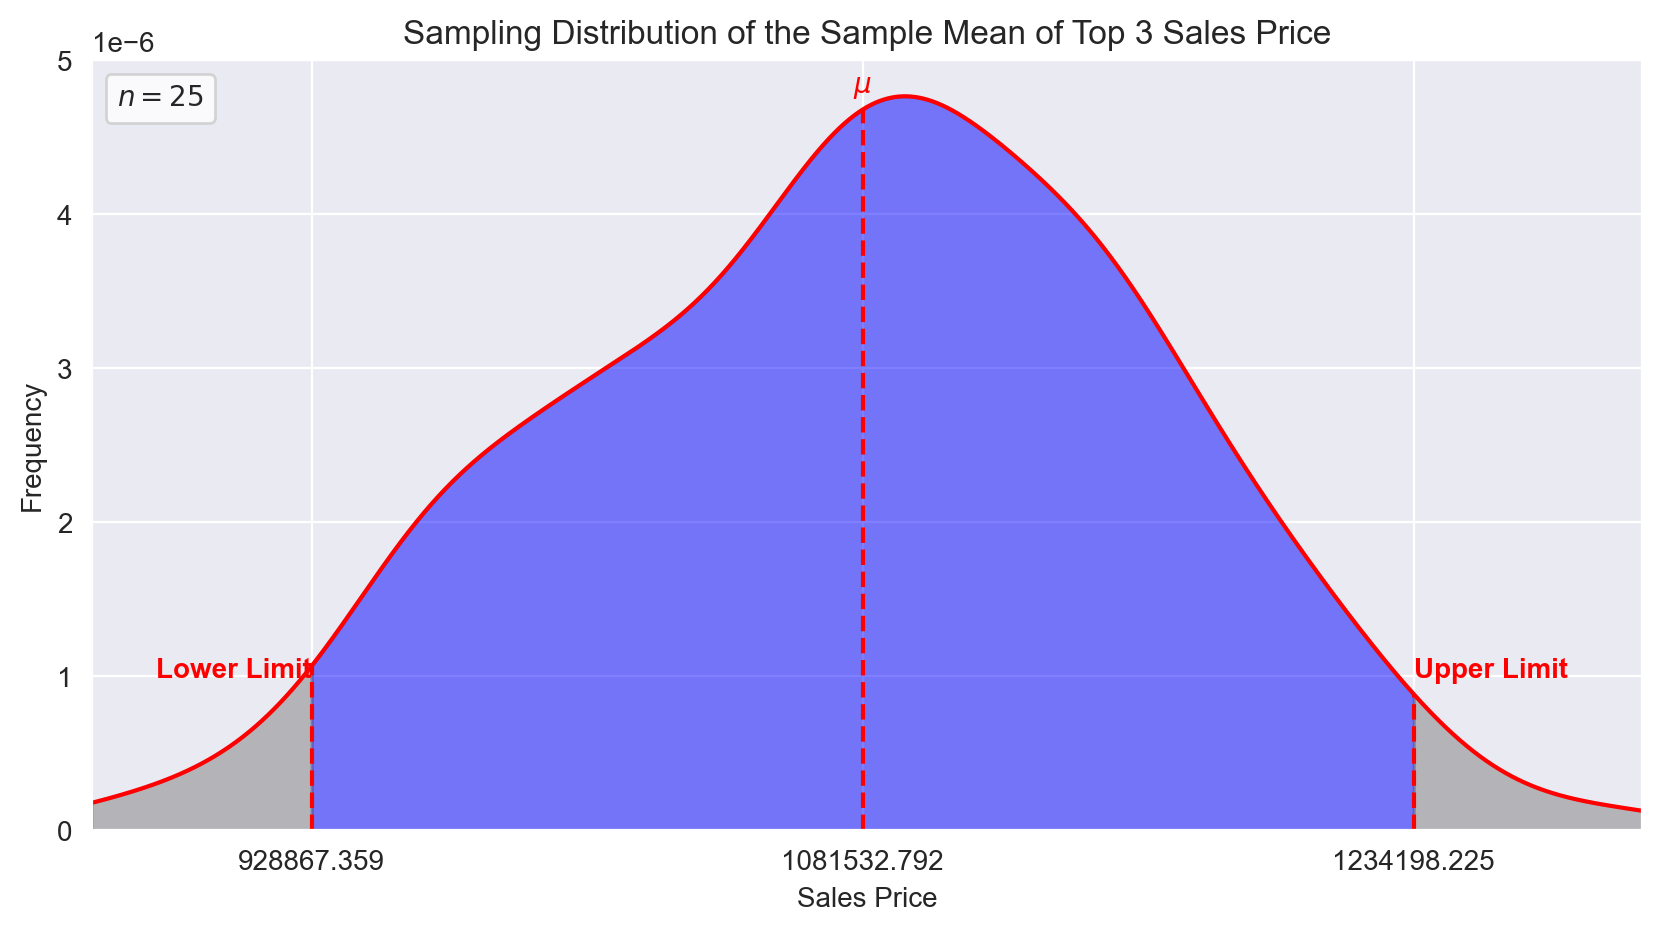

In [34]:
# Memvisualisasikan distribusi sample dari top_3_sale_price dengan upper dan lower limitnya
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)

    kde = gaussian_kde(sample_mean)
    pos = np.linspace(np.min(sample_mean),np.max(sample_mean),10_000)
    plt.plot(pos,kde(pos),color="red",label=f"$n = {n}$")

    shade_95 = np.linspace(lower_95,upper_95,10_000)
    plt.fill_between(shade_95,kde(shade_95),color="blue",alpha=0.5)

    left = np.linspace(np.min(sample_mean),lower_95,10_000)
    right = np.linspace(upper_95,np.max(sample_mean),10_000)
    [plt.fill_between(i,kde(i),color="grey",alpha=0.5) for i in [left,right]]
    
    [plt.vlines(x=i,ymin=0,ymax=kde(i),color="red",linestyle="--") for i in [lower_95,sample_mean_mean,upper_95]]
        
    plt.annotate("Lower Limit",(lower_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="right")
    plt.annotate("$\mu$",(sample_mean_mean,kde(sample_mean_mean)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="center")
    plt.annotate("Upper Limit",(upper_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="left")
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.xticks([lower_95,sample_mean_mean,upper_95],
               [np.round(lower_95,3),np.round(sample_mean_mean,3),np.round(upper_95,3)])
    plt.xlim(np.min(sample_mean),np.max(sample_mean))
    plt.ylabel("Frequency")
    plt.ylim(0,5e-6)
    
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    [item.set_visible(False) for item in leg.legendHandles]
    
    plt.show()

# **Probability Distribution & Hypothesis Testing**

### Hypothesis
- H0 : top_3_sale_price data is normally distributed 
- H1 : top_3_sale_price data is not normally distributed 

### Significance Level 
α=5%


### Test Statistics 

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


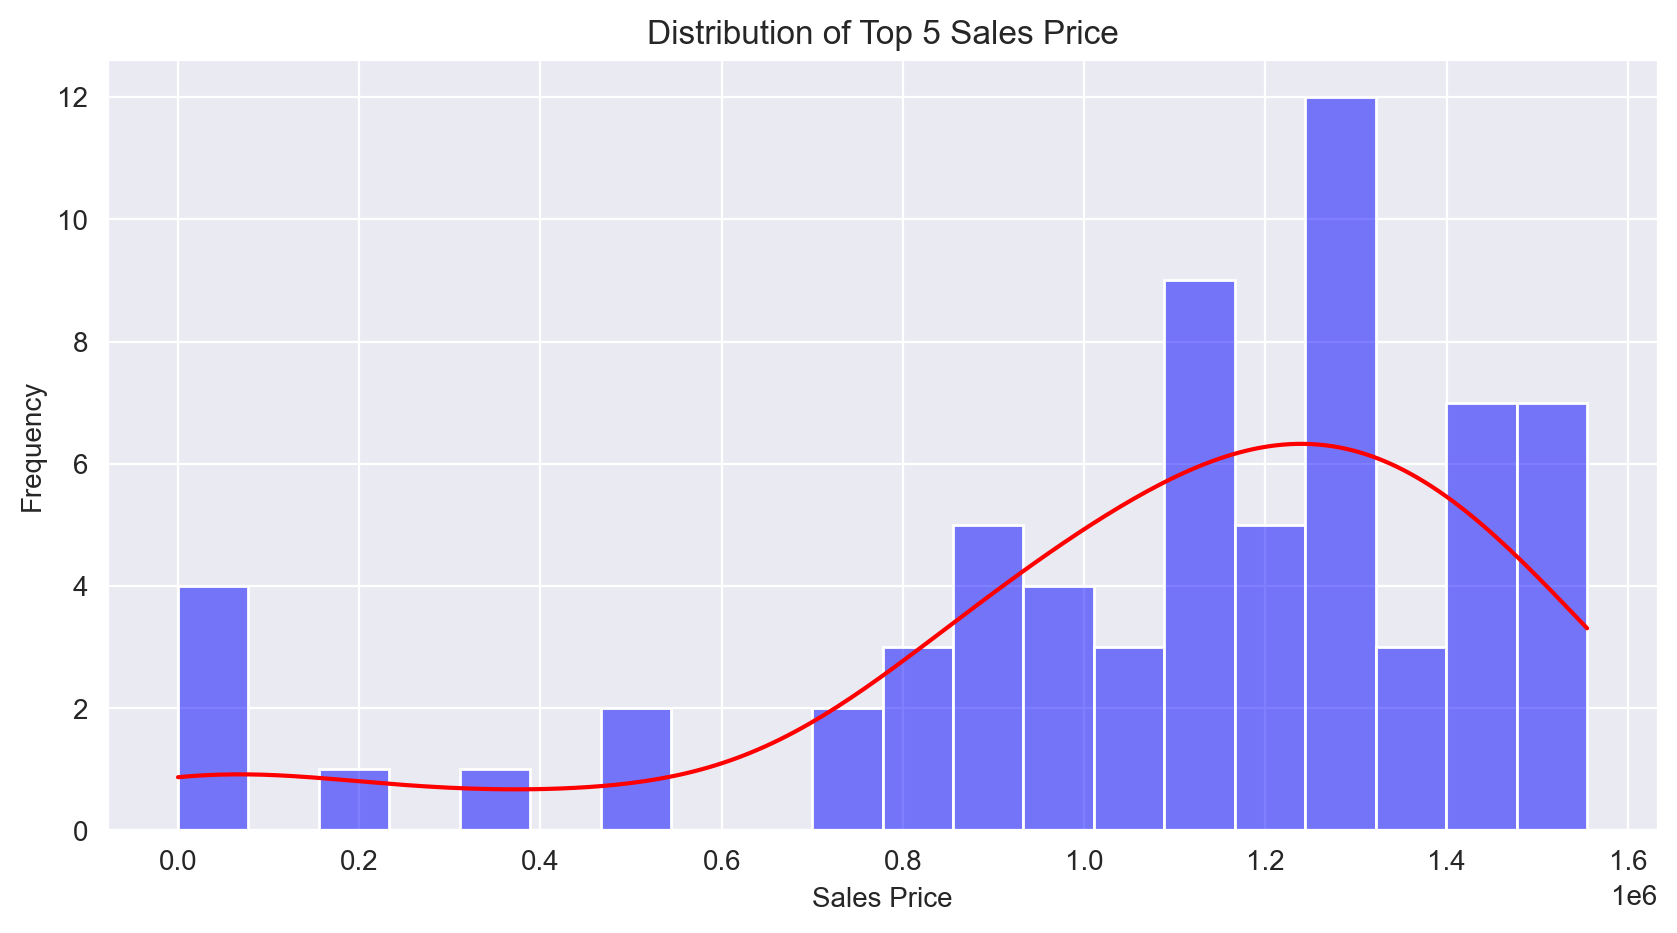

In [35]:
# Membuat plot histogram distribusi dari data top_3_sale_price (Uji visual)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=top_3_sale_price,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 5 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

In [36]:
# Uji formal normalitas 
ks_stat,ks_pval = lilliefors(top_3_sale_price,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(top_3_sale_price)

normality = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality

,Statistics,P-Values
Kolmogorov-Smirnov,0.155275,0.000325
Shapiro-Wilk,0.858422,0.000002


### Daerah Kritis 

Tolak Ho jika nilai p-value < alfa(taraf signifikansi)

### Keputusan dan Kesimpulan

Berdasarkan hasil uji formal dilihat dari p-value pada KS dan SW didapat mereka mendekati 0 yang mana < dari alfa. maka dari itu `tolak Ho` yang artinya tidak berdistribusi normal

In [37]:
# Karena tidak memenuji uji normalitas, maka kita transformasi
sale_price_trans = np.sqrt(np.max(top_3_sale_price)-top_3_sale_price)
sale_price_trans 

array([ 809.32070281,  672.68120235,  282.84271247, 1246.99238169,
       1114.45053726,  484.76798574, 1172.60393996,  844.09715081,
        351.6731437 ,  674.53687816,  173.20508076,  504.97524692,
        504.97524692,  292.40383034,  529.15026221,  259.80762114,
        173.20508076,  393.7003937 , 1245.3662112 ,  484.76798574,
        234.52078799,  200.        ,  651.92024052,  524.40442409,
        489.89794856,  821.58383626,  777.81745931,  674.53687816,
        616.4414003 ,  824.62112512,  595.81876439,  552.26805086,
        552.26805086,  674.53687816,  616.4414003 ,  173.20508076,
        674.53687816,  710.63352018, 1229.63409192,  452.76925691,
        731.43694192,  393.7003937 ,  543.13902456,  897.21792225,
          0.        ,  845.57672626,  744.98322129, 1027.13192921,
        360.55512755,  595.81876439,  324.03703492,  568.30449585,
        636.39610307,  452.76925691,  538.51648071,  539.44415837,
        636.39610307,  674.53687816,  888.81944173,  418.33001

Setelah melakukan transformasi, kita kembali untuk menguji hipotesis 

### Hypothesis
- H0 : top_3_sale_price data is normally distributed 
- H1 : top_3_sale_price data is not normally distributed 

### Significance Level 
α=5%

### Statistik Uji

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


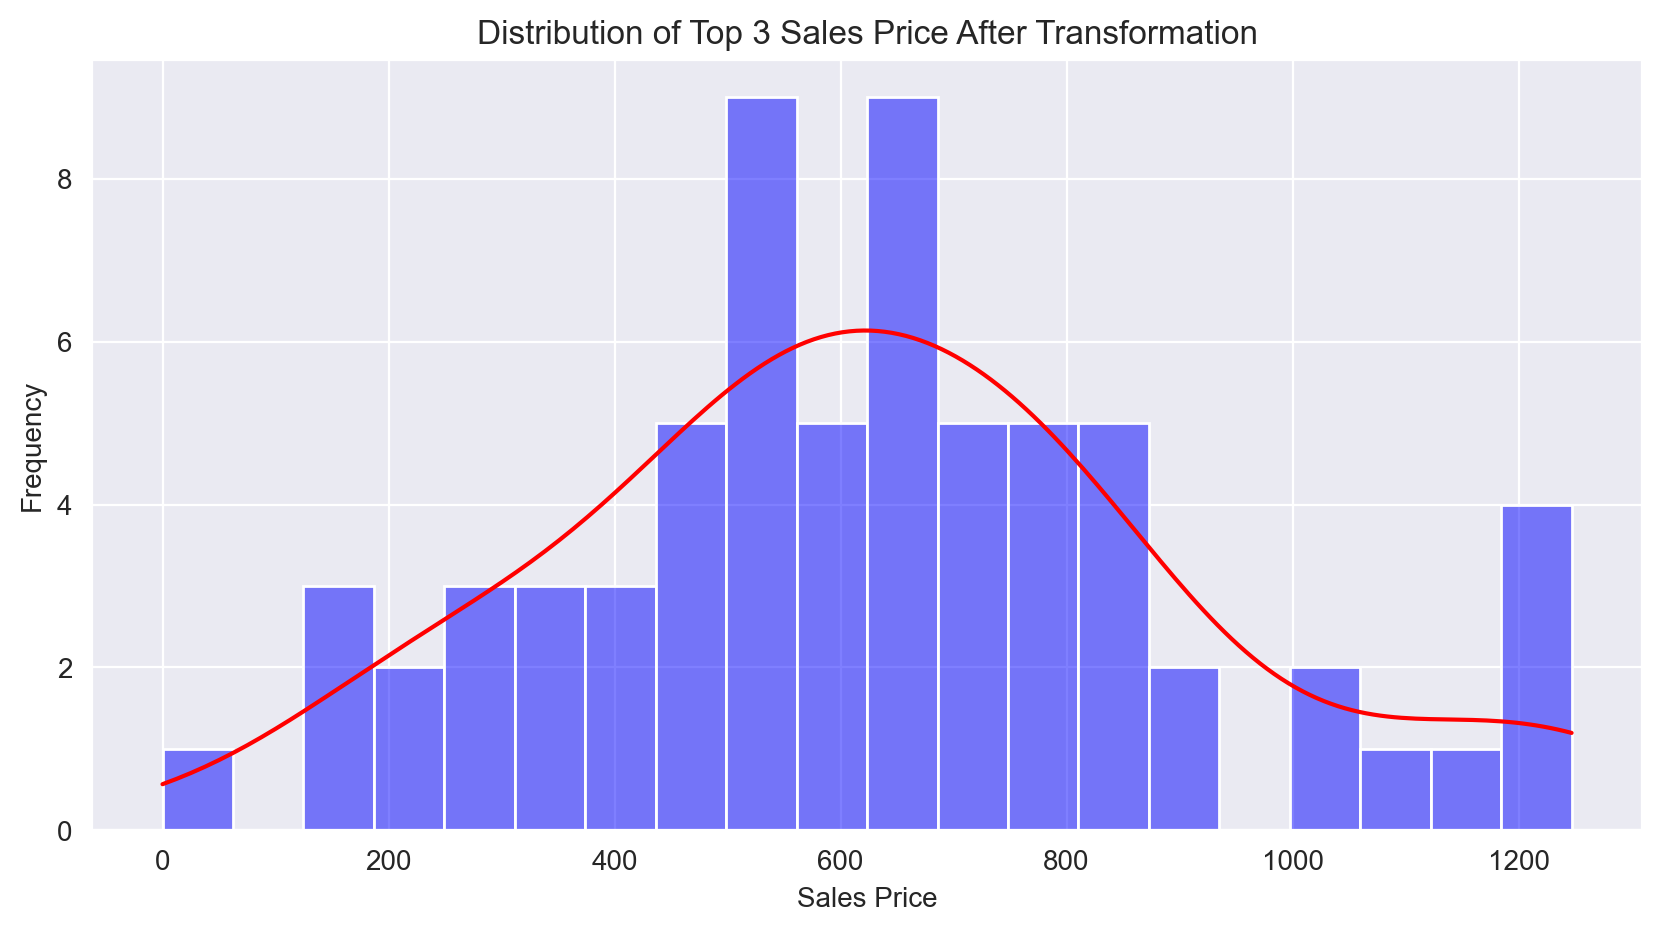

In [38]:
# Uji Visual normalitas 
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sale_price_trans,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 3 Sales Price After Transformation")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

In [39]:
# Uji Formal Normalitas
ks_stat,ks_pval = lilliefors(sale_price_trans,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(sale_price_trans)

normality_trans = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality_trans

,Statistics,P-Values
Kolmogorov-Smirnov,0.076455,0.479724
Shapiro-Wilk,0.975025,0.188753


### Daerah Kritis 
Tolak Ho jika p-value < alfa(taraf signifikansi)

### Keputusan dan Kesimpulan 

Berdasarkan hasil uji visual dan formal didapat nilai p-value yang dihasilkan baik pada KS maupun SW > alfa(taraf signifikansi). Maka dapat disimpulkan, bahwa data berdistribusi normal

# **Conclusion** 

Berdasarkan output di atas, dapat dilihat secara visual bahwa distribusinya kira-kira simetris, sehingga tampaknya terdistribusi secara normal. Kemudian secara formal, probabilitas Kolmogorov-Smirnov = 0, 48 > 0, 05 dan nilai-p Shapiro-Wilk = 0, 19 > 0, 05. Sehingga dapat disimpulkan bahwa data tersebut berdistribusi normal. Oleh karena itu, asumsi normalitas terpenuhi secara visual dan formal.  